<class 'pandas.core.frame.DataFrame'>
Int64Index: 11908 entries, 0 to 26847
Data columns (total 10 columns):
country               11908 non-null object
year                  11908 non-null int64
sex                   11908 non-null object
age                   11908 non-null object
suicides_no           11908 non-null int64
population            11908 non-null int64
suicides/100k pop     11908 non-null float64
 gdp_for_year ($)     11908 non-null object
gdp_per_capita ($)    11908 non-null int64
generation            11908 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 1023.3+ KB


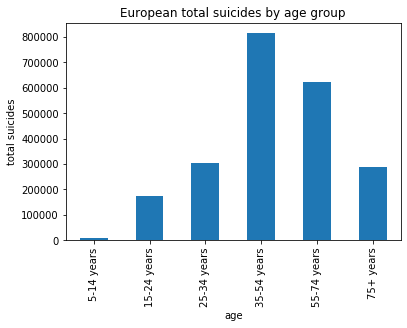

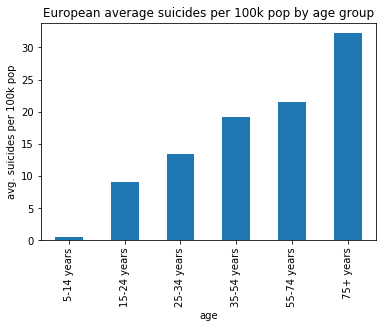

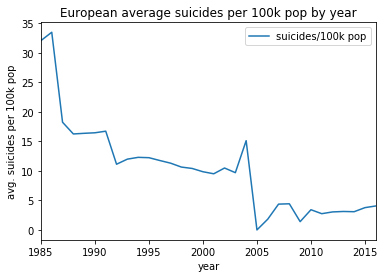

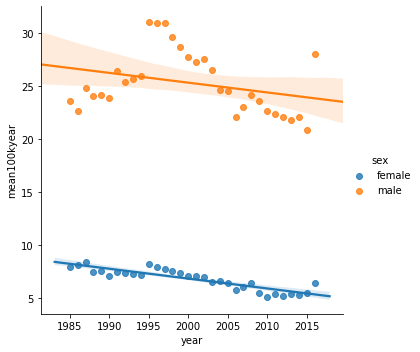

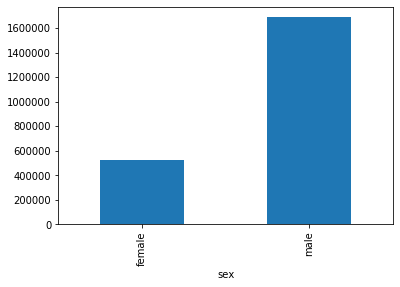

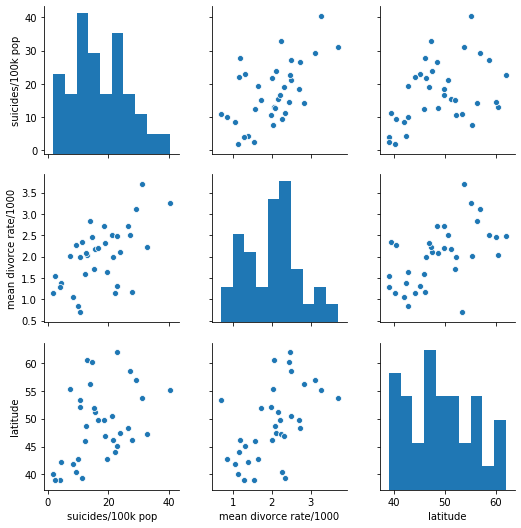

<class 'pandas.core.frame.DataFrame'>
Index: 3965 entries, Afghanistan to Last Updated: 10/28/2019
Data columns (total 20 columns):
Country Code     3960 non-null object
Series Name      3960 non-null object
Series Code      3960 non-null object
2000 [YR2000]    3960 non-null object
2001 [YR2001]    3960 non-null object
2002 [YR2002]    3960 non-null object
2003 [YR2003]    3960 non-null object
2004 [YR2004]    3960 non-null object
2005 [YR2005]    3960 non-null object
2006 [YR2006]    3960 non-null object
2007 [YR2007]    3960 non-null object
2008 [YR2008]    3960 non-null object
2009 [YR2009]    3960 non-null object
2010 [YR2010]    3960 non-null object
2011 [YR2011]    3960 non-null object
2012 [YR2012]    3960 non-null object
2013 [YR2013]    3960 non-null object
2014 [YR2014]    3960 non-null object
2015 [YR2015]    3960 non-null object
2016 [YR2016]    3960 non-null object
dtypes: object(20)
memory usage: 650.5+ KB


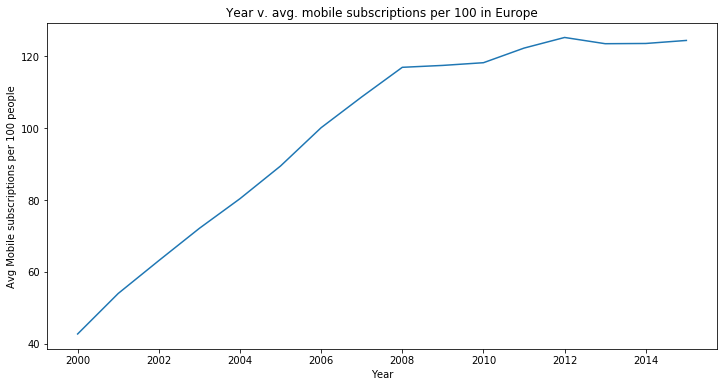

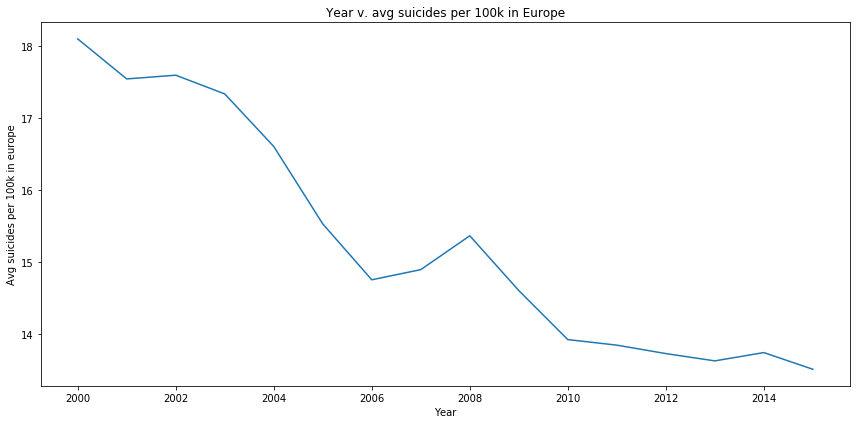

interactive(children=(IntSlider(value=2000, description='year', max=2015, min=2000), Output()), _dom_classes=(…

<function __main__.yearplot(year)>

In [64]:
%run ExploratoryAnalysis.ipynb

Hypothesis Testing

In [65]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [66]:
eurocide_others = eurocide_others.groupby('year',as_index=False)[['suicides/100k pop','Mobile cellular subscriptions (per 100 people)','Electric power consumption (kWh per capita)']].mean()
#condensing other variables

In [67]:
eurocide_others=eurocide_others.iloc[:16]

In [68]:
slope, inter = np.polyfit(eurocide_others['year'],eurocide_others['suicides/100k pop'],1)
#fitting a linear regression

In [69]:
x= np.linspace(2000,2025,26)
y=slope*x + inter

In [70]:
prediction_2025 = slope*2025+ inter
prediction_2025
#Based on the linear model from our data, we could project suicide rates in europe to drop below 10 per 100k in the year 2025

9.59190454669681

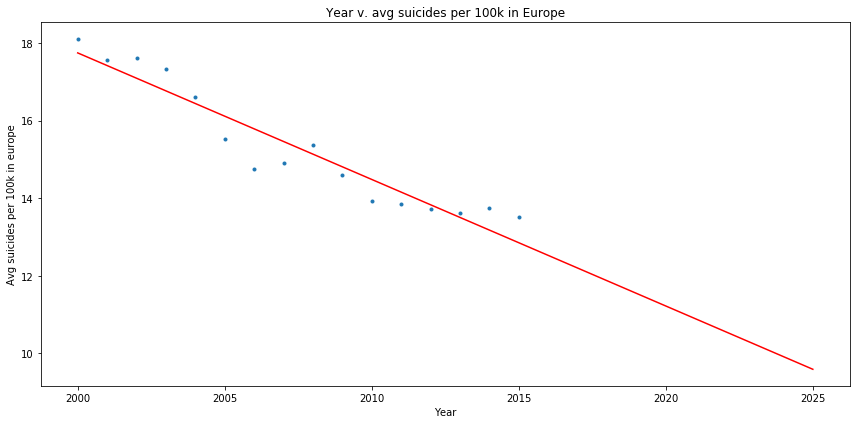

In [71]:
plt.figure(figsize=(12,6))
plt.plot(eurocide_others['year'],eurocide_others['suicides/100k pop'], marker='.',linestyle='none')
plt.xlabel('Year')
plt.ylabel('Avg suicides per 100k in europe')
plt.title('Year v. avg suicides per 100k in Europe')
plt.tight_layout()
plt.plot(x,y,color='red')
plt.show()

In [72]:
suicidevlat.head()

,country,suicides/100k pop,mean divorce rate/1000,latitude
0,Austria,23.760,2.100,47.516
1,Azerbaijan,1.855,1.142,40.143
2,Belarus,31.076,3.700,53.710
3,Belgium,21.238,2.508,50.504
4,Bulgaria,19.489,1.642,42.734


In [73]:
slope, inter =np.polyfit(suicidevlat['suicides/100k pop'],suicidevlat['mean divorce rate/1000'], 1)

In [74]:
x= np.linspace(0,45, 46)
y= slope *x + inter

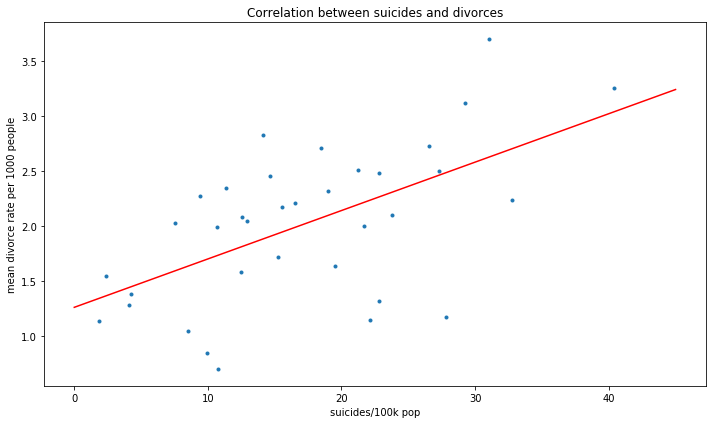

In [75]:
plt.figure(figsize=(10,6))
plt.plot(suicidevlat['suicides/100k pop'],suicidevlat['mean divorce rate/1000'], linestyle='none', marker='.')
plt.xlabel('suicides/100k pop')
plt.ylabel('mean divorce rate per 1000 people')
plt.title('Correlation between suicides and divorces')
plt.plot(x,y,color='red')
plt.tight_layout()
plt.show()

Hypothesis test:

    Null Hypothesis: Divorce rates and suicides are not correlated to each other. Therefore the slope of a linear regression would be 0.
    
    Alternative Hypothesis: Divorce rates and suicides are positively correlated.

In [76]:
#bootstrap linear regression
bs_slopes, bs_inters= draw_bs_pairs_linreg(suicidevlat['suicides/100k pop'],suicidevlat['mean divorce rate/1000'],1000)

In [77]:
np.percentile(bs_slopes,[2.5,97.5])
#The 95% percentile range for the slope

array([0.02109815, 0.0636875 ])

Text(0, 0.5, 'count out of 1000 random samples')

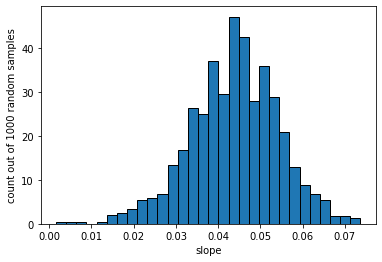

In [78]:
plt.hist(bs_slopes, bins=30, density=True, ec='k')
plt.xlabel('slope')
plt.ylabel('count out of 1000 random samples')
plt.title('Bootstrap Slope Simulations')

In [79]:
pval = np.sum(bs_slopes <= 0)/len(bs_slopes)
pval
#The p value is very low because there wasn't a single 0 or less slope in our distibution.
#We should reject the null hypothesis

0.0

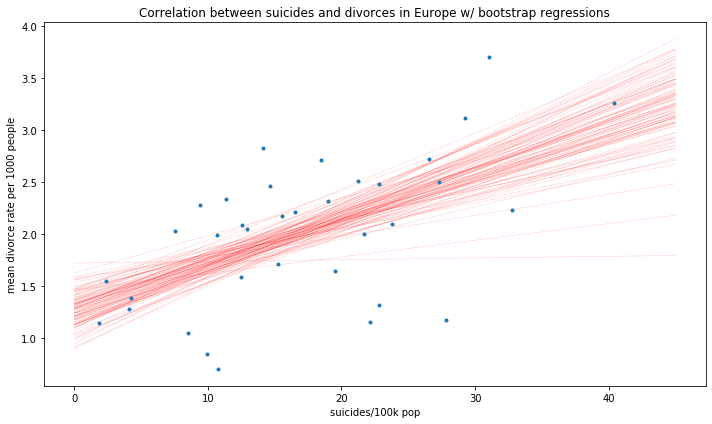

In [80]:
#simulation of bootstrap random samples
plt.figure(figsize=(10,6))

for i in range(100):
    plt.plot(x,bs_slopes[i]*x + bs_inters[i],linewidth=0.5, alpha=0.2, color='red')
    

plt.plot(suicidevlat['suicides/100k pop'],suicidevlat['mean divorce rate/1000'], linestyle='none', marker='.')
plt.xlabel('suicides/100k pop')
plt.ylabel('mean divorce rate per 1000 people')
plt.title('Correlation between suicides and divorces in Europe w/ bootstrap regressions')
plt.tight_layout()
plt.show()

Hypothesis test:

Null Hypothesis: Country Latitude and suicides are not correlated to each other. Therefore the slope of a linear regression for the population would be 0.

Alternative Hypothesis: Divorce rates and suicides are positively correlated.

In [82]:
#bootstrap hypothesis test: regressions for latitude
bs_slope2, bs_int2 = draw_bs_pairs_linreg(suicidevlat['suicides/100k pop'], suicidevlat['latitude'], 1000)

In [83]:
np.percentile(bs_slope2,[2.5,97.5])
#95 percentile confidence interval for the slope between suicides and latitude.

array([0.08845424, 0.48623168])

Text(0.5, 1.0, 'Bootstrap Slope Simulations')

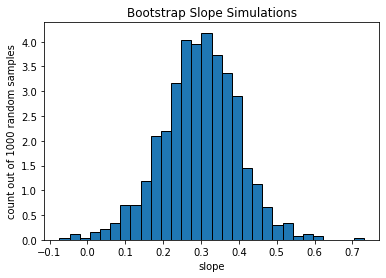

In [85]:
plt.hist(bs_slope2, bins=30, density=True, ec='k')
plt.xlabel('slope')
plt.ylabel('count out of 1000 random samples')
plt.title('Bootstrap Slope Simulations')

In [87]:
pval2 = np.sum(bs_slope2<= 0)/ len(bs_slope2)
pval2
#The p value is very low at 0.005. It is outside of our 95% confidence interval, so we would say a result of 0 or less for the
#slope is very unlikely. It's a good inference to reject the null hypothesis in this case.

0.005

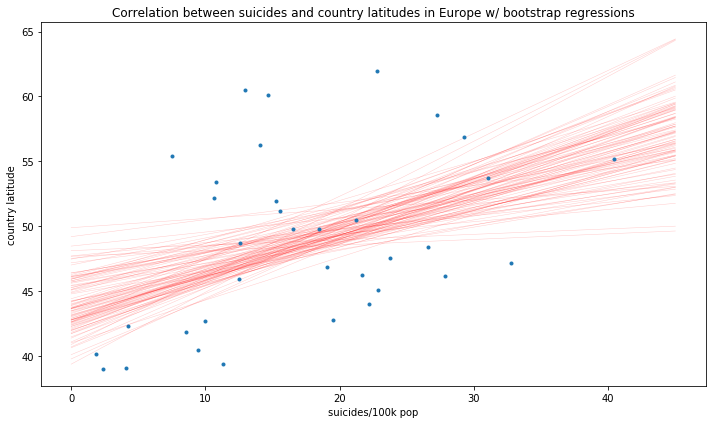

In [88]:
plt.figure(figsize=(10,6))

for i in range(100):
    plt.plot(x,bs_slope2[i]*x + bs_int2[i],linewidth=0.5, alpha=0.2, color='red')
    

plt.plot(suicidevlat['suicides/100k pop'],suicidevlat['latitude'], linestyle='none', marker='.')
plt.xlabel('suicides/100k pop')
plt.ylabel('country latitude')
plt.title('Correlation between suicides and country latitudes in Europe w/ bootstrap regressions')
plt.tight_layout()
plt.show()